In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style="ticks", color_codes=True)
pd.set_option('display.max_rows', None)

#source: https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [2]:
%pwd

'D:\\Work\\Box Sync\\jupyter_files'

In [3]:
# select the location of working directory
# folder location 
%cd D:\Work\Box Sync\

D:\Work\Box Sync


In [4]:
'''
# Read and store content of an excel file 
base_file = pd.read_excel(r'Depop Survey results\May_10_Numeric\SurveyData_June_1.xlsx', sheet_name='Survey+for+transportation+chall')
# Write the dataframe object into csv file
base_file.to_csv (r'Depop Survey results\May_10_Numeric\Survey_data_July05.csv', index = None, header=True)

'''

"\n# Read and store content of an excel file \nbase_file = pd.read_excel(r'Depop Survey results\\May_10_Numeric\\SurveyData_June_1.xlsx', sheet_name='Survey+for+transportation+chall')\n# Write the dataframe object into csv file\nbase_file.to_csv (r'Depop Survey results\\May_10_Numeric\\Survey_data_July05.csv', index = None, header=True)\n\n"

In [5]:
# read csv file and convert into a dataframe object
df0 = pd.read_csv(r'Depop Survey results\May_10_Numeric\Survey_data_July05.csv', header= 1)
# dropping the first row
df0 = df0.iloc[1: , :]
## df00 manually claned data
# df00 = pd.read_csv(r'Survey results\May_10_Numeric\Survey_data_July05 - copy.csv', header= 0)
#df00[(df00.Finished == 0)]['For which city are you filling out this survey?']


In [6]:
# List of unfinished surveys
#df0[(df0.Finished == '0')].iloc[:,19]
# unique responses
#df0['For which city are you filling out this survey?'].nunique()

In [7]:
#count columns sumsalong each row
df0['colsums'] = df0.count(axis=1)
# dropping the rows with fewer responses
# the number 49 has been decided by manually inspecting the data
# > 49 covers cities that have responses up to challenges and solutions section of the questionnaire
df1 = df0[df0.count(axis=1)>49]

In [8]:
# extracting only valid cities by excluding 'not agree' and 'not in the list' options
df2 = df1[(df1.iloc[:,18] != '2') & (df1.iloc[:,19] != 'Not in the list')]

In [9]:
# dropping general info columns
df2.drop(df2.iloc[:,0:19], inplace = True, axis = 1)

C:\Users\uttar\AppData\Local\Temp\ipykernel_18184\2055228762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.iloc[:,0:19], inplace = True, axis = 1)


In [10]:
# sorting by name and reseting index
# sorting by column sums to easily drop the duplicates with fewer responses since they are organized by ascending order
df_survey = df2.sort_values(by=['For which city are you filling out this survey?', 'colsums'],ignore_index=True)

In [11]:
df_survey.head()
len(df_survey.columns)

239

In [12]:
#renames columns
NewColNames = ['Name', 	'Health care and social assistance', 	'Retail trade', 	'Manufacturing', 	
               'Professional, scientific, and technical services', 	'Accommodation and food services', 	
               'Administrative and support and waste management and remediation services', 	'Finance and insurance',
               'Transportation and warehousing', 	'Other services (except government and government enterprises)',
               'Construction', 	'Real estate and rental and leasing', 	'Wholesale trade', 	'Educational services',
               'Arts, entertainment, and recreation', 	'Information', 	'Management of companies and enterprises', 
               'Farm employment', 	'Utilities', 	'Mining, quarrying, and oil and gas extraction', 
               'Forestry, fishing, and related activities', 	'MobilityChallegew/oCar', 	'Trip to work', 
               'Trip to school', 	'Trip to health care', 	'Shopping trips', 
               'Recreational trips (Trips made to a recreational facility/ visiting family or friend)', 
               'People still make trips using other modes', 	'I dont know', 	'Other (trips)', 
               'Other_Text(trips)', 	'PT_y/n', 	'PT_serviceExtent', 	'PT_serviceExtent_Text', 	'PT_Bus', 	'PT_Train',
               'PT_Metro', 	'PT_Subway', 	'PT_Other (please specify)', 	'PT_Text', 	'PT_serviceOffered', 
               'PT_serviceOffered_Text', 	'Fare coordination', 	'Schedule coordination',
               'Information coordination', 	'Facility and vehicle coordination', 	'Inter agency agreements',
               'No coordination', 	'Others', 	'Text', 	'Co_authority', 	'Co_Extent',
               'Co_Extent_Text', 'TNCs_y/n', 'TNCs', 'TNCs_Text', 'OT_y/n', 'OTs', 'OT_Everyone', 
               'OT_Low income people', 'OT_People with physical disabilities', 'OT_Seniors', 'OT_Other (please specify)',
               'OT_Text', 	'ChallengestoTrip', 'High fuel cost', 'Traffic congestion',
               'Poor pavement condition', 'Poor traffic lighting', 'Illegal parking',
               'Lack of parking', 'Too far destination','Other (please specify)(PC)', 'Text(PC)', 'Infrequent service',
               'Transit fare', 'Fewer service', 'Low capacity','Lack of connectivity between public transit services', 
               'No direct route to the destination','Lack of easy access to real time information', 
               'Poor availability of services during holidays, weekends and late hours', 
               'Lack of an integrated service connecting neighboring cities', 
               'Lack of benches/ sheds/ seats at stops', 'Not clean', 'Other (please specify)(PT)',
               'Text(PT)', 'High cost', 'Safety issues', 'Lack of technical ability', 'Lack of digital knowledge', 
               'Low incentive', 'Little demand', 'Not competitive','Other (please specify)(TNC)', 'Text (TNC)', 'Topography is not biking friendly',
               'No bike lane', 'Inadequate bike lane', 	'Lack of continuity of cycling path',
               'Safety', 	'Not enough bikes to use in bikesharing', 'Not enough parking stations', 'Cost of bikesharing', 
               'Other (please specify)(Bike)', 	'Text(Bike)', 'Narrow paths', 'Uneven surfaces','Lack of continuity of walking paths', 
               'Lack of green spaces and resting areas', 'Parking consumes sidewalk space', 
               'Not enough lights on sidewalks', 'Not safe to walk alone', 'Not safe to walk at night or early morning', 'Residents dont like to walk', 
               'Residents cannot walk unless its a very short distance (elderly people)', 
               'Other (please specify)(Ped)', 'Text(Ped)', 'Better maintenance of existing roadways', 
               'More roadways development', 'More parking lots construction', 'Parking fee reduction',
               'Charging stations for electric vehicles (EVs)', 'Encouraging carpool', 
               'Introducing incentives for some trips', 'Other (please specify)(PCsols)', 'Text(PCsols)',
               'More frequent service', 'Benches/ sheds/ seats at stops', 'Extended current service area','Additional stops along the route',
               'Reduced capacity vehicles(PT)','Dedicated bus lane', 'Subsidy by the federal/state government', 
               'Regional transit development connecting neighboring cities(PT)', 'Other (please specify)(PTsols)', 
               'Text(PTsols)', 'Promotions/free ride for trial', 'Encouraging ride sharing, ride hailing', 
               'More incentives for workers of this services', 'Improve safety for riders',
               'Improve safety for drivers', 'Other (please specify)(TNCsols)', 'Text(TNCsols)', 
               'Pilot project to promote bike sharing services', 'Develop separate bike lane',
               'Integrate bike with public transit services', 'Secured bike parking', 'Ensure safety', 'Other (please specify)(Bikesols)', 'Text(Bikesols)', 
               'Improved sidewalks', 'Enough streetlights', 'Ensure safety of Pedestrians', 'Other (please specify)(Pedsols)', 'Text(Pedsols)',
               'Imp_sols_Travel on demand (available to all)',
               'Imp_sols_Service for special needs population (e.g., for seniors/ people with physical disabilities)', 
               'Imp_sols_Optimizing existing network by making signal adjustment', 'Imp_sols_Road widening', 
               'Imp_sols_Increasing parking areas', 'Imp_sols_Developing local services (shops, hospitals, colleges) for the community', 
               'Imp_sols_Promoting online services for business and delivery', 	'Imp_sols_Encouraging bicycles and scooters',
               'Imp_sols_Other (please specify)', 'Imp_sols_Text', 	'phy_dis_Not accessible public transit', 
               'phy_dis_Lack of paratransit (on demand, doortodoor) services', 'phy_dis_Affordability', 
               'phy_dis_Driving inability', 'phy_dis_Insufficient funding', 
               'phy_dis_Noncompliant infrastructure (streets, sidewalks, crosswalks, curb ramps, crossing signals, street parking)', 	'phy_dis_Other (please specify)', 	'phy_dis_Text', 	'Skim_disability', 	'Skim_disability_explained', 	'Inno_Introducing autonomous vehicles', 	'Inno_Low cost on demand TNC services to replace public transit in low density areas', 	'Inno_Sharing vehicles among multiple services', 	'Inno_Online trip plan share platform to find travel mates and ride together', 	'Inno_Pick up drop off services integrated with Public Transit network', 	'Inno_Reducing roadway capacity in low demand areas', 	'Inno_Creating local business districts to bring service opportunities close to the community', 	'Inno_Promoting local tourist attractions', 	'Inno_Encouraging work from home', 	'Inno_Other (please specify)', 	'Inno_Text', 	'Sols_to_imp', 	'Transport_projects', 	'Transport_projects_type', 	'Transport_projects_type_Text', 	'Chall_Proj_Access to federal funds', 	'Chall_Proj_Access to state funds', 	'Chall_Proj_Local match funds', 	'Chall_Proj_Lack of citizens involvement', 	'Chall_Proj_Lack of business involvement', 	'Chall_Proj_Lack of staff', 	'Chall_Proj_Lack of technical capability', 	'Chall_Proj_Lack of technology', 	'Chall_Proj_Lack of time', 	'Chall_Proj_Rightsizing the projects', 	'Chall_Proj_Demand projection difficulties', 	'Chall_Proj_Other (please specify)', 	'Chall_Proj_Text', 	'finan_Federal fund', 	'finan_State fund', 	'finan_Local fund', 	'finan_Farebox', 	'finan_Donation', 	'finan_Private finance', 	'finan_Other (please specify)', 	'finan_Text', 	'finan_strategy_sg', 	'MneySpent', 	'MoneySpent_Text', 	'InvestmentDecision_ Accessibility for all', 	'InvestmentDecision_ Community Vitality', 	'InvestmentDecision_ Congestion mitigation', 	'InvestmentDecision_ Cost effectiveness/ Return on investment', 	'InvestmentDecision_ Economic development', 	'InvestmentDecision_ Environmental impacts', 	'InvestmentDecision_ Favor disadvantaged people', 	'InvestmentDecision_ Integration with existing or planned land use', 	'InvestmentDecision_ Local priorities', 	'InvestmentDecision_ Promote driving', 	'InvestmentDecision_ Promote nonmotorized travel', 	'InvestmentDecision_ Promote transit', 	'InvestmentDecision_ Safety', 	'InvestmentDecision_ Other (please specify)', 	'InvestmentDecision_ Text', 	'%popBroadband', 	'%popBroadband_Text', 	'%popLTE', 	'%popLTE_Text', 	'CommEnggResidents', 	'CommEnggRepresentatives', 	'Comment_city', 	'Comment_survey', 'colsums']
len(NewColNames)


239

In [13]:
if len(NewColNames) == len(df_survey.columns):
    df_survey.columns = NewColNames
else:
    print("column numbers mismatch")

#replaces all -99s and NaNs for all data types to 0
df_survey = df_survey.replace([-99,'-99', 'NaN', np.NaN], 0)

In [14]:
df = df_survey
print(df.columns[df.columns.duplicated(keep=False)])

Index([], dtype='object')


In [15]:
#converting object classes to numeric data for analysis
# select columns that has text input filtered based on column name
text_cols = df_survey.columns[df_survey.columns.str.contains('Comment') |df_survey.columns.str.contains('Text')].tolist() 
# selecting the remaining numeric columns
numeric_cols = df_survey.loc[:, ~df_survey.columns.isin(text_cols)].columns
# the first column is name, so excluded
cols = numeric_cols[1:len(numeric_cols)]
# changing numeric columns to number from object dype
df_survey[cols] = df_survey[cols].apply(pd.to_numeric, errors='coerce')

In [16]:
# dropping duplicates and keeping only the first values and reseting index
df_survey = df_survey.drop_duplicates('Name', keep='last').reset_index(drop=True)

In [17]:
df_for_dash =  df_survey.drop(['Name'], axis = 1)
df_for_dash.to_csv(r'D:\Work\Box Sync\Depop Survey results\surveydataAnonymized.csv')

In [18]:
df_survey.groupby(['ChallengestoTrip']).agg({'Name':'count'})

,Name
ChallengestoTrip,
1,29
2,23
3,14


In [19]:
df_survey.groupby(['TNCs_y/n']).agg({'Name':'count'})

,Name
TNCs_y/n,
1,23
2,35
3,8


In [20]:
# trips facing disfficultis w/o car or not
df_survey.groupby(['MobilityChallegew/oCar','PT_y/n']).agg({'Name':'count'})
# public transit service extant
df_survey.groupby(['PT_y/n', 'PT_serviceExtent']).agg({'Name':'count'})
# provided with what type of PT
df_survey.groupby(['PT_y/n','PT_Train','PT_Metro', 'PT_Subway','PT_Bus']).agg({'Name':'count'})
# available TNCs
df_survey.groupby(['TNCs_y/n', 'MobilityChallegew/oCar']).agg({'Name':'count'})

Name
TNCs_y/n MobilityChallegew/oCar      
1        1                          9
         2                          8
         3                          6
2        1                         20
         2                          8
         3                          7
3        1                          4
         2                          2
         3                          2

C:\Users\uttar\AppData\Local\Temp\ipykernel_18184\1599579903.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.append(df.iloc[:,mode_range_1[i]:mode_range_2[i]].sum(axis = 0).sort_values(ascending=False).head(3))


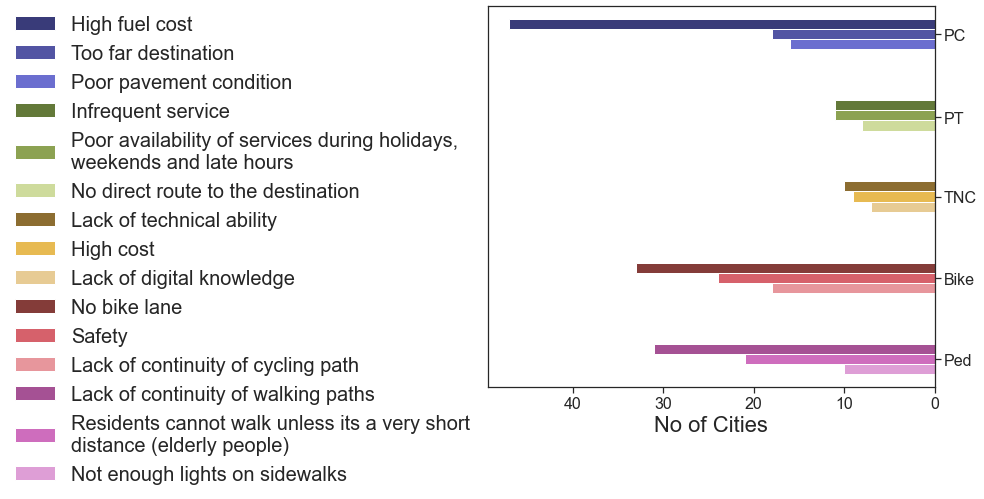

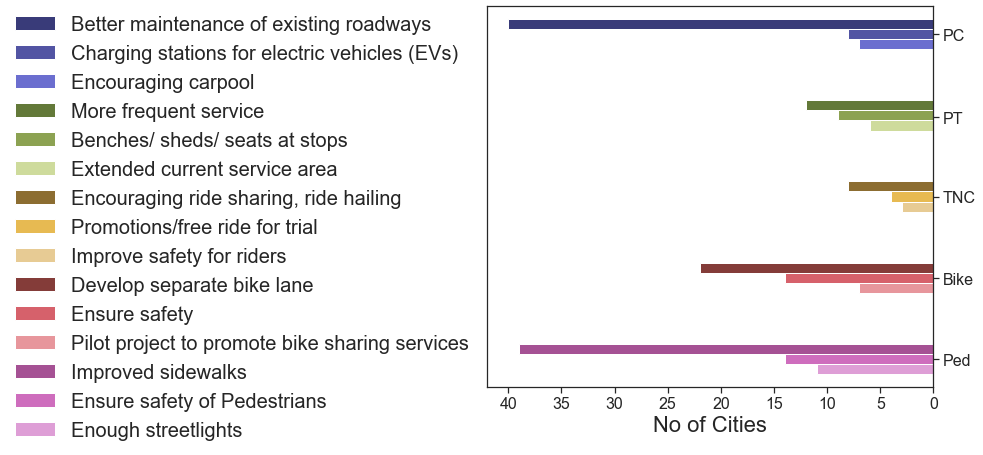

In [52]:
from textwrap import fill
# plotting major three chalenges and solutions for each mode
def plot_top_three(df, range1, range2, xlabelName, ylabelName):
    df_new = []
    mode_range_1 =  range1
    mode_range_2 = range2 
    for i in range(len(mode_range_1)):
        # to get all values change the value inside head()
        df_new.append(df.iloc[:,mode_range_1[i]:mode_range_2[i]].sum(axis = 0).sort_values(ascending=False).head(3))

    df_new = pd.DataFrame(df_new)
    ax = df_new.plot(kind='barh', width=3, rot=0, colormap='tab20b', figsize=(8, 7), fontsize = 'large')
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.yaxis.tick_right()

    #plt.legend(bbox_to_anchor=(0.,-0.350, 1., 1.102), loc=3, numpoints=1, ncol=2 , borderaxespad=0., fancybox=True, shadow=True,prop={'size':22})


    labels = [fill(l, 53) for l in df_new.columns]
    ax.legend(labels, bbox_to_anchor=(0, 1.025), loc='upper right', prop={'size': 20}, frameon=False)
    plt.rcParams['font.family'] = 'sans-serif'
    ax.tick_params(labelsize=16)
    plt.xlabel(xlabelName, fontsize = 22)
    #plt.ylabel(ylabelName, fontsize = 22)
    #y-axis tick labels
    #plt.yticks(color='w')
    #plt.tick_params(left = False)
    ax.set_yticks([-1.2, 0.43, 2, 3.6, 5.2])
    ax.set_yticklabels(["PC", "PT", "TNC", "Bike", "Ped"])#, rotation=40)
    plt.savefig(str(mode_range_1)+ '.png', bbox_inches='tight', dpi=300)
    
plot_top_three(df_survey,[65, 74, 87, 96, 108] ,[73, 86, 95, 107, 117],"No of Cities","Mode")
plot_top_three(df_survey,[118, 127, 137, 144, 151],[126, 136, 142, 149, 154],"No of Cities","Mode")

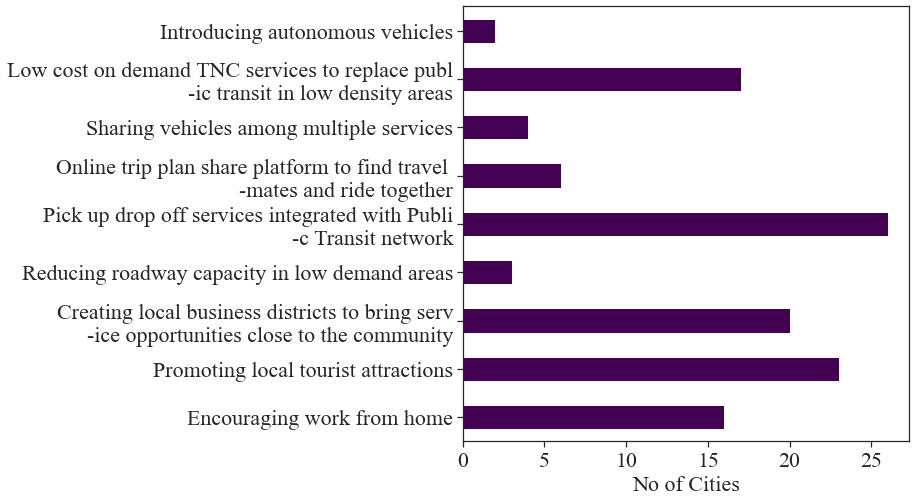

In [22]:
# plot the responses to othe questions
def plot_responses(df, colidx1, colidx2, splitValue, xlabelName):
    x_labelsnames = []
    plt.rcParams['font.family'] = 'Times New Roman' #'sans-serif'
    df_plot = df.iloc[:,colidx1:colidx2] # [:,176:185], 5 // [:,191:202], 11 //[:,204:210], 6 //[:,215:228], 19 // [:,22:30], 5// [:,42:49],3  // 
    for x in df_plot.columns: 
        x_labelsnames.append(x[splitValue:])
    xlabels_new = [re.sub("(.{47})", "\\1\n-", label, 0, re.DOTALL) for label in x_labelsnames]
    ax =df_plot.sum(axis=0).plot.barh(colormap='viridis', figsize=(8, 8), fontsize = 'large')
    ax.invert_yaxis()
    ax.tick_params(labelsize=22)
    ax.set_xlabel(xlabelName, fontsize = 22)
    ax.set_yticklabels(xlabels_new)

    plt.savefig(str(colidx1)+ '.png', bbox_inches='tight', dpi=300)
    #print(df_plot.sum(axis=0))
    print('\n')

#plot_responses(df_survey, 22, 30, 0, "No of Cities")
plot_responses(df_survey, 176, 185, 5, "No of Cities")

In [23]:
#plot_responses(df_survey, 42, 49, 0, "No of Cities")

In [24]:
#plot_responses(df_survey, 156, 164, 9, "No of Cities")

In [25]:
#plot_responses(df_survey, 156, 164, 9, "No of Cities")

In [26]:
#plot_responses(df_survey, 166, 172, 8, "No of Cities")

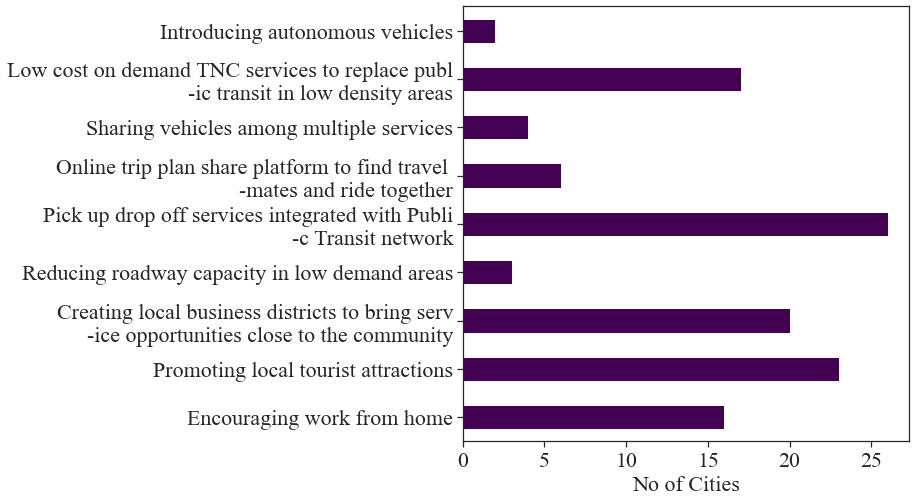

In [27]:
plot_responses(df_survey, 176, 185, 5, "No of Cities")

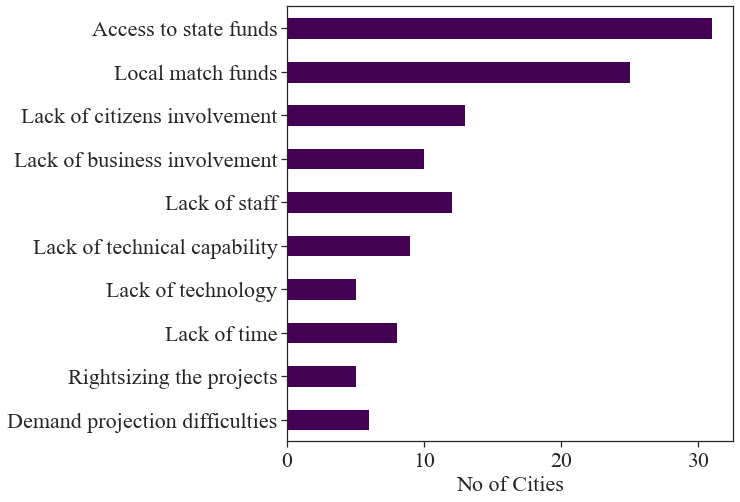

In [28]:
plot_responses(df_survey, 192, 202, 11, "No of Cities")

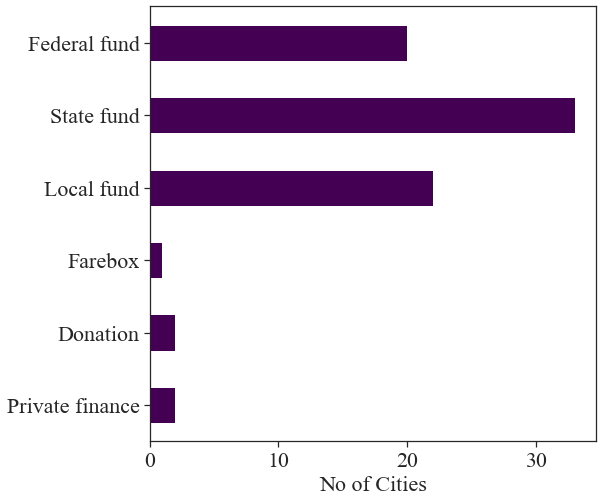

In [29]:
plot_responses(df_survey, 204, 210, 6, "No of Cities")

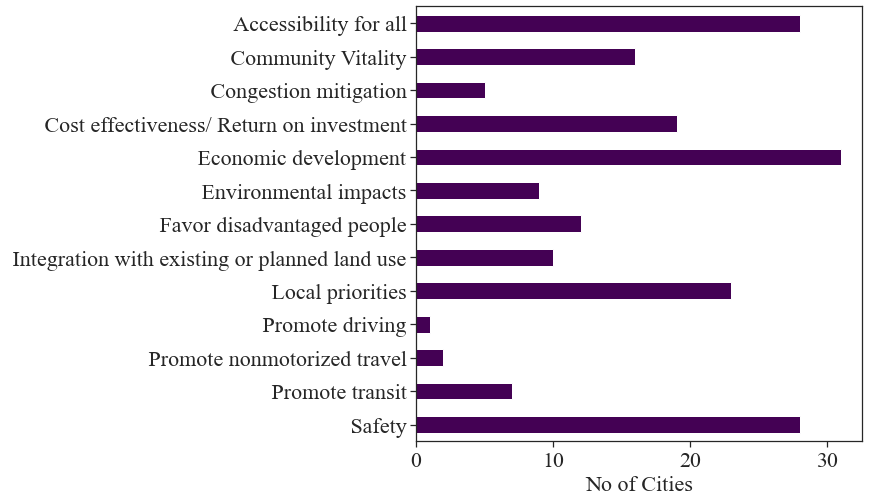

In [30]:
plot_responses(df_survey, 215, 228, 19, "No of Cities")

Improved sidewalks              39
Ensure safety of Pedestrians    14
Enough streetlights             11
dtype: int64


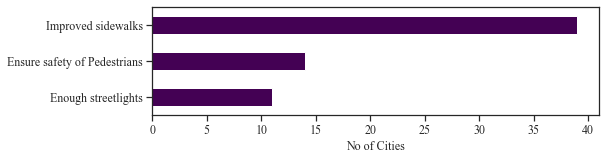

In [31]:
#create bar plots of aggregated values for selected columns in descending order
def make_barh_plot(df, fcol,lcol): # input beginning and ending column index number ex. df.iloc[:, 1:21].sum().plot.barh()
    ax = df.iloc[:,fcol:lcol].sum().sort_values(ascending=False).plot.barh(colormap='viridis',
                                                                             figsize=(8, 2), fontsize = 'large')
    ax.invert_yaxis()
    ax.set_xlabel("No of Cities", fontsize = 12)
    print(df.iloc[:,fcol:lcol].sum().sort_values(ascending=False))
    
#make_barh_plot(df_survey, 1,21)

#make_barh_plot(df_survey, 22,28)
#make_barh_plot(df_survey, 34,39)
#make_barh_plot(df_survey, 42,49)
#make_barh_plot(df_survey, 65,72)
#make_barh_plot(df_survey, 74,86)
#make_barh_plot(df_survey, 87,94)
#make_barh_plot(df_survey, 97,107)
#make_barh_plot(df_survey, 108,117)
#make_barh_plot(df_survey, 120,126)
#make_barh_plot(df_survey, 128,136)
#make_barh_plot(df_survey, 138,144)
#make_barh_plot(df_survey, 146,149)
make_barh_plot(df_survey, 151,154)

In [121]:
#copy clustered cities' data in the same folder
df_cluster = pd.read_csv(r'Depop Study IL\Census Data\R_code\Depopulation_Map\depopulating_with_attr.csv')
#df_cluster

In [ ]:
#if we use weights as responding cities in total depopulating
# but this weight shouldn't be reasonable
#w = len(df_survey)/len(df_cluster)
#df_survey[df_survey.select_dtypes(include=['number']).columns] *= w

In [14]:
'''
len(col_names_without_mode)
#df_survey.columns.values[65:156] = col_names_without_mode

 'High fuel cost(PC)', 'Traffic congestion(PC)',
               'Poor pavement condition(PC)', 'Poor traffic lighting(PC)', 'Illegal parking(PC)',
               'Lack of parking(PC)', 'Too far destination(PC)','Other (please specify)(PC)', 'Text(PC)', 'Infrequent service(PT)',
               'Transit fare(PT)', 'Fewer service(PT)', 'Low capacity(PT)','Lack of connectivity between public transit services(PT)', 
               'No direct route to the destination(PT)','Lack of easy access to real time information(PT)', 
               'Poor availability of services during holidays, weekends and late hours(PT)', 
               'Lack of an integrated service connecting neighboring cities(PT)', 
               'Lack of benches/ sheds/ seats at stops(PT)', 'Not clean(PT)', 'Other (please specify)(PT)',
               'Text(PT)', 'High cost(TNC)', 'Safety issues(TNC)', 
               'Lack of technical ability(TNC)', 'Lack of digital knowledge(TNC)', 
               'Low incentive(TNC)', 'Little demand(TNC)', 'Not competitive(TNC)',
               'Other (please specify)(TNC)', 'Text (TNC)', 'Topography is not biking friendly(Bike)',
               'No bike lane(Bike)', 'Inadequate bike lane(Bike)', 	'Lack of continuity of cycling path(Bike)',
               'Safety(Bike)', 	'Not enough bikes to use in bikesharing(Bike)',
               'Not enough parking stations(Bike)', 'Cost of bikesharing(Bike)', 
               'Other (please specify)(Bike)', 	'Text(Bike)', 'Narrow paths(Ped)', 
               'Uneven surfaces(Ped)', 	'Lack of continuity of walking paths(Ped)', 
               'Lack of green spaces and resting areas(Ped)', 'Parking consumes sidewalk space(Ped)', 
               'Not enough lights on sidewalks(Ped)', 'Not safe to walk alone(Ped)', 
               'Not safe to walk at night or early morning(Ped)', 'Residents dont like to walk(Ped)', 
               'Residents cannot walk unless its a very short distance (elderly people)(Ped)', 
               'Other (please specify)(Ped)', 'Text(Ped)', 'Better maintenance of existing roadways(PC)', 
               'More roadways development(PC)', 'More parking lots construction(PC)', 'Parking fee reduction(PC)',
               'Charging stations for electric vehicles (EVs)(PC)', 	'Encouraging carpool(PC)', 
               'Introducing incentives for some trips(PC)', 	'Other (please specify)(PCsols)', 'Text(PCsols)',
               'More frequent service(PT)', 	'Benches/ sheds/ seats at stops(PT)', 
               'Extended current service area(PT)', 	'Additional stops along the route(PT)',
               'Reduced capacity vehicles(PT)', 	'Dedicated bus lane(PT)', 
               'Subsidy by the federal/state government(PT)', 
               'Regional transit development connecting neighboring cities(PT)', 'Other (please specify)(PTsols)', 
               'Text(PTsols)', 'Promotions/free ride for trial(TNC)', 'Encouraging ride sharing, ride hailing(TNC)', 
               'More incentives for workers of this services(TNC)', 'Improve safety for riders(TNC)',
               'Improve safety for drivers(TNC)', 'Other (please specify)(TNCsols)', 'Text(TNCsols)', 
               'Pilot project to promote bike sharing services(Bike)', 'Develop separate bike lane(Bike)',
               'Integrate bike with public transit services(Bike)', 'Secured bike parking(Bike)', 
               'Ensure safety(Bike)', 'Other (please specify)(Bikesols)', 'Text(Bikesols)', 
               'Improved sidewalks(Ped)', 'Enough streetlights(Ped)', 'Ensure safety(Ped)', 
               'Other (please specify)(Pedsols)', 'Text(Pedsols)',
'''

"\nlen(col_names_without_mode)\n#df_survey.columns.values[65:156] = col_names_without_mode\n\n 'High fuel cost(PC)', 'Traffic congestion(PC)',\n               'Poor pavement condition(PC)', 'Poor traffic lighting(PC)', 'Illegal parking(PC)',\n               'Lack of parking(PC)', 'Too far destination(PC)','Other (please specify)(PC)', 'Text(PC)', 'Infrequent service(PT)',\n               'Transit fare(PT)', 'Fewer service(PT)', 'Low capacity(PT)','Lack of connectivity between public transit services(PT)', \n               'No direct route to the destination(PT)','Lack of easy access to real time information(PT)', \n               'Poor availability of services during holidays, weekends and late hours(PT)', \n               'Lack of an integrated service connecting neighboring cities(PT)', \n               'Lack of benches/ sheds/ seats at stops(PT)', 'Not clean(PT)', 'Other (please specify)(PT)',\n               'Text(PT)', 'High cost(TNC)', 'Safety issues(TNC)', \n               'Lack

In [ ]:
df_cluster.shape, df_survey.shape

In [ ]:
#df_cluster.columns

In [125]:
# creating density filed for dat cluster
df_cluster['density_km2'] = df_cluster['B01003_001E']/df_cluster['Area_km2']
# counting number of cities per cluster, all other variables are also count values
# need to change to average or some representative stat for other variables
df_cluster_count = df_cluster.groupby(['Cluster'], as_index=False).agg(lambda x: x[x != 0].count())
# spliting the state name from NAME of cluster data to join with survey data 
#df_cluster["Name"] = df_cluster['NAME'].str.split(',').str[0]
df_joined = pd.merge(df_survey, df_cluster.iloc[:,4:93], left_on='Name', right_on='NAME')
#df_joined

In [126]:
#plt.scatter(df_cluster['DIST_Metro'], df_cluster['density_km2'])

In [127]:
len(df_cluster.columns)

93

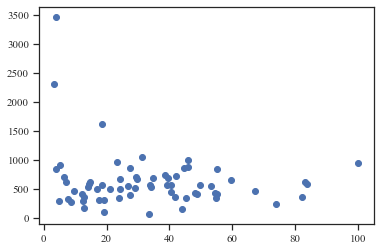

In [128]:
df_joined
plt.scatter(df_joined['DIST_Metro'], df_joined['density_km2'])

In [129]:
# for current case the data was sorted already in excel and again before findind duplicates
# sorting the responses by citynames, if the names are not sorted
df_joined = df_joined.drop_duplicates('Name') 
df_joined = df_joined.sort_values(by=['Name'])
#df_joined = df_joined.reset_index(drop=True)

In [130]:
# grouping cities by population range
def df_by_range(input_df, column_name, bin_list):
    if len(input_df[column_name].unique())>10:  # not a very good condition, but works for now
        new_col = 'range_' + column_name[:3]
        input_df[new_col] = pd.cut(x = input_df[column_name], bins = bin_list)
        new_df = input_df.set_index(new_col).ne(0).sum(level=0)
    else:
        new_df = input_df.set_index(column_name).ne(0).sum(level=0)
        new_df = new_df.sort_index()
    #new_df.reset_index()
    #input_df.groupby(level =1).agg(lambda x: x[x!=0].count())
    return new_df.reset_index()

In [131]:
# median pop 1428, mean pop 6254.262
binsize = [0, 500, 1000, 5000, 20000, 200000]
#df_by_pop0 = df_by_range(df_cluster,'B01003_001E', binsize)
df_by_popS = df_by_range(df_joined,'B01003_001E', binsize)

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\4166925791.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_df = input_df.set_index(new_col).ne(0).sum(level=0)


In [132]:
df_by_popS 

,range_B01,Name,Health care and social assistance,Retail trade,Manufacturing,"Professional, scientific, and technical services",Accommodation and food services,Administrative and support and waste management and remediation services,Finance and insurance,Transportation and warehousing,...,Cluster,Clus 1,Clus 2,Clus 3,Clus 4,Clus 5,Clus 6,Comment,Area_km2,density_km2
0,"(0, 500]",4,0,0,0,0,2,0,0,0,...,4,4,4,4,4,4,4,4,4,4
1,"(500, 1000]",12,1,5,3,1,1,0,1,2,...,12,12,12,12,12,12,12,12,12,12
2,"(1000, 5000]",23,8,12,6,2,12,1,5,1,...,23,23,23,23,23,23,23,23,23,23
3,"(5000, 20000]",21,15,11,10,1,9,1,7,4,...,21,21,21,21,21,21,21,21,21,21
4,"(20000, 200000]",6,6,3,6,3,3,2,3,4,...,6,6,6,6,6,6,6,6,6,6


In [41]:
#df_joined.select_dtypes(exclude=np.number).columns
#df_joined.select_dtypes(np.number).columns

In [134]:
def plot_compare_raw_survey(raw_df, survey_df, groupby_col, column_name):
    plot_raw =  plt.plot(raw_df.groupby(groupby_col).agg({column_name:['mean', 'max', 'min']}))
    plot_survey = plt.plot(survey_df.groupby(groupby_col).agg({column_name:['mean', 'max', 'min']}))
    plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left', borderaxespad = 0)
    plt.xticks(range(len(df)), ['very small', 'small', 'medium', 'medium-large', 'large'], rotation=30)
    plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left', borderaxespad = 0)
    plt.xlabel("Population Categories")
    plt.ylabel("Orginal and survey statistics for " + column_name)
    #plt.title(plot_title)

#plot_compare_raw_survey(df_cluster, df_joined, 'range_B01','DIST_Metro')
#plot_compare_raw_survey(df_cluster, df_joined, 'range_B01','DIST_Chica')
#plot_compare_raw_survey(df_cluster, df_joined, 'range_B01','DIST_HOSP')
#plot_compare_raw_survey(df_cluster, df_joined, 'range_B01','density_km2')

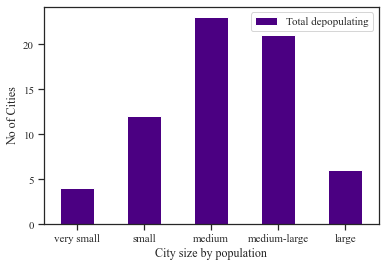

In [159]:
#df_by_pop0.iloc[:,1].plot.bar(color = 'slateblue')
df_by_popS.iloc[:,1].plot.bar(color = 'indigo')
plt.xticks(range(len(df_by_popS)), ['very small', 'small', 'medium', 'medium-large', 'large'], rotation=0)
plt.xlabel("City size by population")
plt.ylabel("No of Cities")
plt.legend(['Total depopulating','Survey responses'])

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\3258610264.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


<Figure size 1080x576 with 0 Axes>

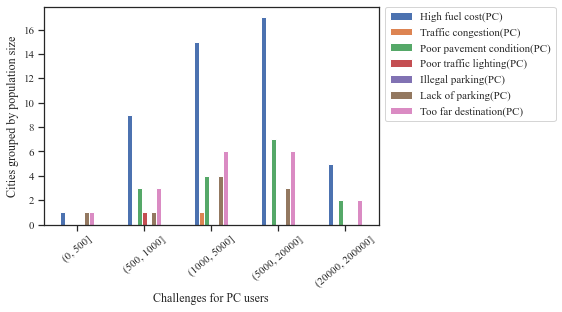

<Figure size 1080x576 with 0 Axes>

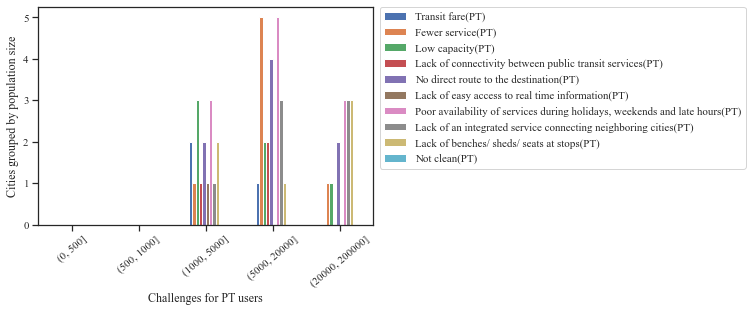

<Figure size 1080x576 with 0 Axes>

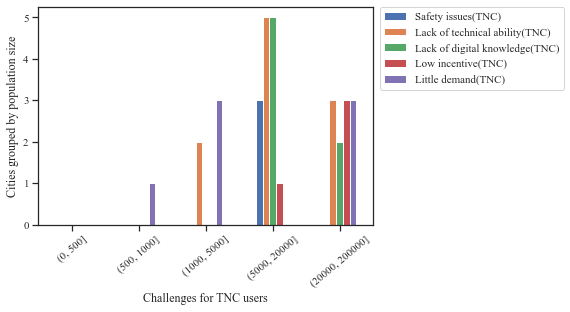

<Figure size 1080x576 with 0 Axes>

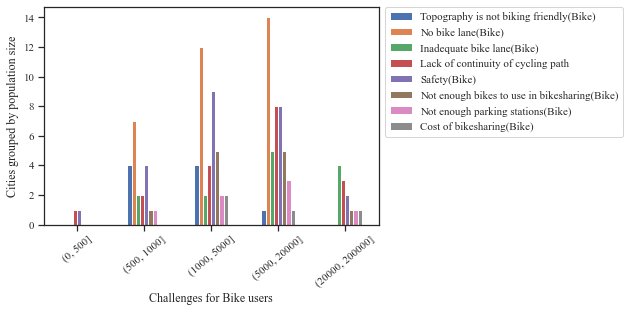

<Figure size 1080x576 with 0 Axes>

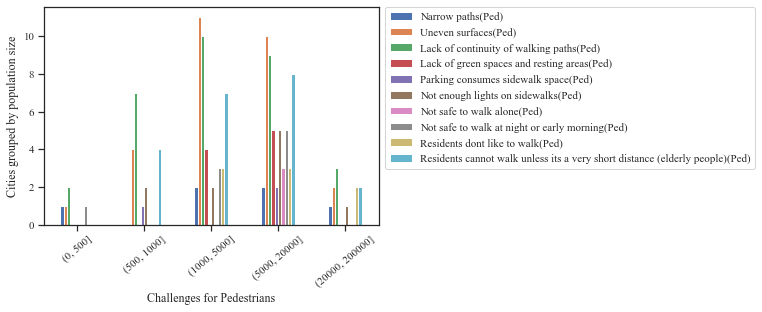

<Figure size 1080x576 with 0 Axes>

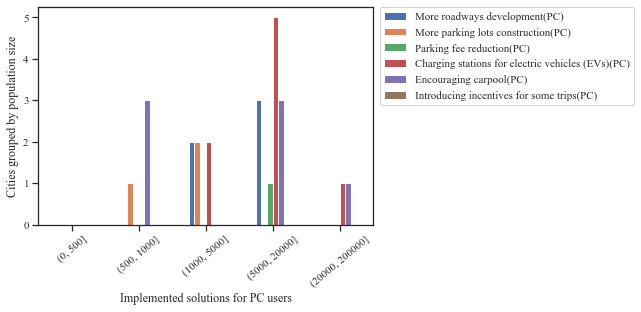

<Figure size 1080x576 with 0 Axes>

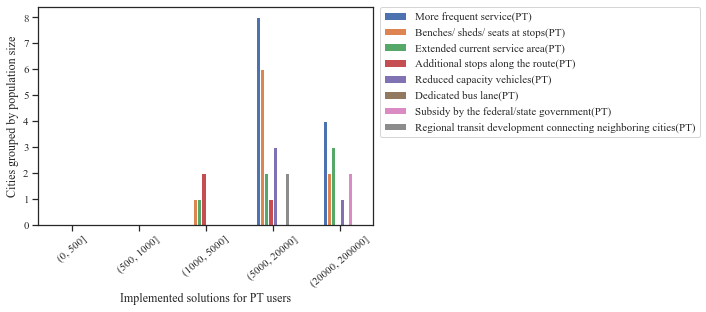

<Figure size 1080x576 with 0 Axes>

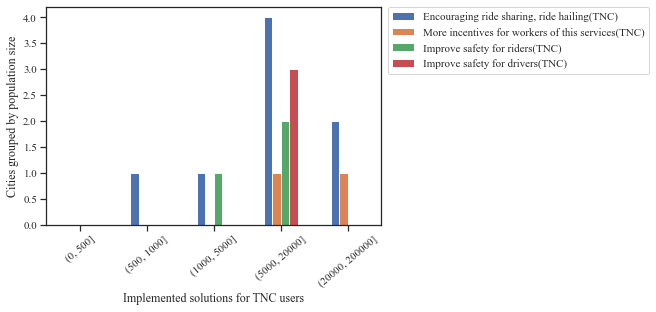

<Figure size 1080x576 with 0 Axes>

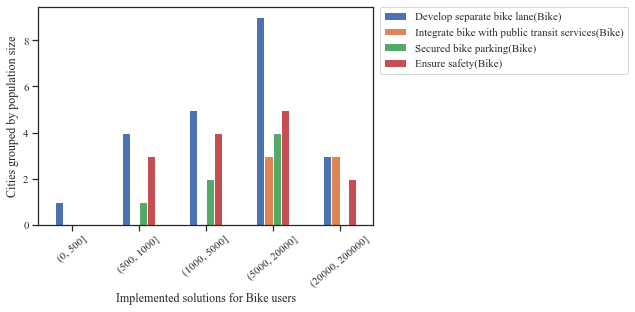

<Figure size 1080x576 with 0 Axes>

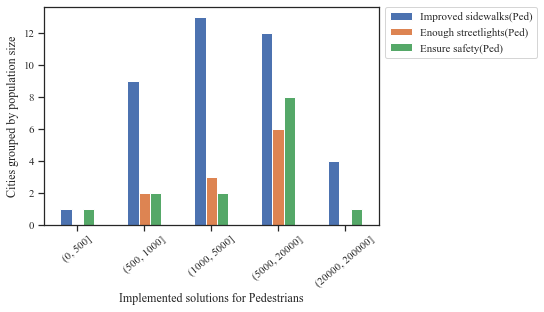

<Figure size 1080x576 with 0 Axes>

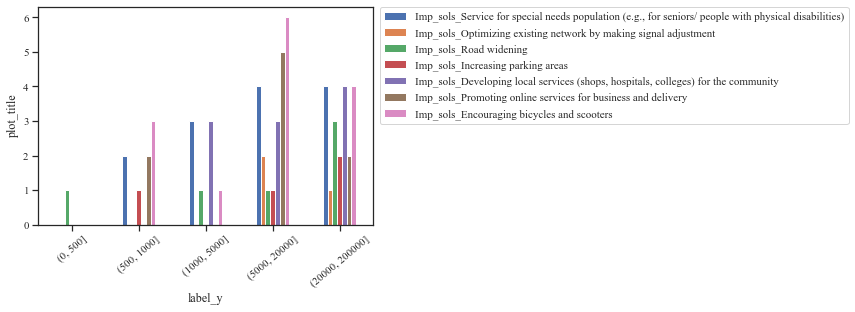

<Figure size 1080x576 with 0 Axes>

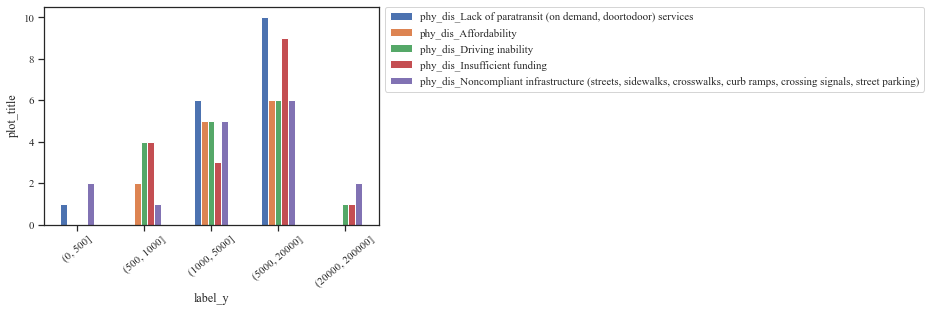

<Figure size 1080x576 with 0 Axes>

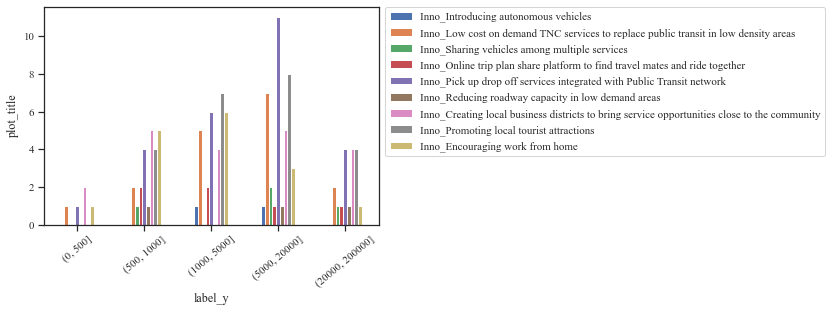

In [136]:
def make_plot(df_name, col_no_x, column_start_idx, column_end_idx, labelname_x, labelname_y):
    #x = df_name.columns[col_no_x]
    #y = df_name.columns[col_range_y1:col_range_y2]
    plt.figure(figsize = (15,8))
    #df_name.plot(x,y, kind ='bar', width = 0.8, colormap = 'Paired')
    df_name.iloc[:, column_start_idx:column_end_idx].plot.bar()
    plt.xticks(range(len(df_name)), df_name.iloc[:,0], rotation=40)
    plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left', borderaxespad = 0)
    plt.ylabel(labelname_y)
    plt.xlabel(labelname_x)
    #plt.title(plot_title)
    name =  get_df_name(df_name) + '_plot_' + str(column_start_idx)
    plt.savefig(name+ '.png', bbox_inches='tight', dpi=600)
    
    
make_plot(df_by_popS, 0, 66,73, 'Challenges for PC users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 76,86, 'Challenges for PT users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 89,94, 'Challenges for TNC users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 97,105, 'Challenges for Bike users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 107,117,'Challenges for Pedestrians', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 120,126, 'Implemented solutions for PC users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 128,136, 'Implemented solutions for PT users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 139,143, 'Implemented solutions for TNC users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 146,150, 'Implemented solutions for Bike users', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 152,155, 'Implemented solutions for Pedestrians', 'Cities grouped by population size')
make_plot(df_by_popS, 0, 158,165, 'label_y', 'plot_title')
make_plot(df_by_popS, 0, 168,173, 'label_y', 'plot_title')
make_plot(df_by_popS, 0, 177,186, 'label_y', 'plot_title')

([<matplotlib.axis.XTick at 0x1d205bdb9a0>,
 [Text(0, 0, 'very samll'),
  Text(1, 0, 'small'),
  Text(2, 0, 'medium'),
  Text(3, 0, 'medium-large'),
  Text(4, 0, 'large')])

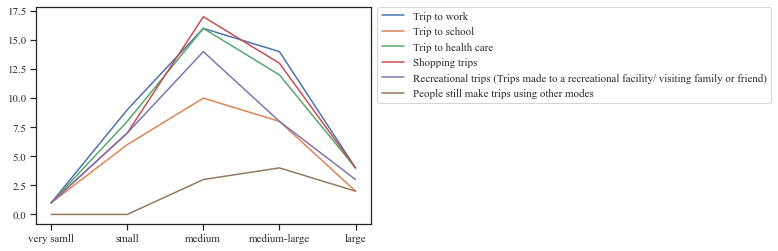

In [137]:
df_by_popS.iloc[:,23:29].plot()
plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left', borderaxespad = 0)
plt.xticks(range(len(df_by_popS)), ['very samll', 'small', 'medium', 'medium-large', 'large'], rotation=0)

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\4166925791.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_df = input_df.set_index(new_col).ne(0).sum(level=0)
C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\4166925791.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_df = input_df.set_index(new_col).ne(0).sum(level=0)
C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\3258610264.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt

<Figure size 1080x576 with 0 Axes>

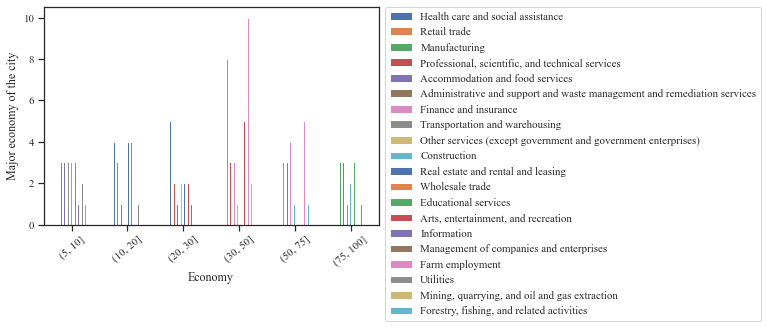

<Figure size 1080x576 with 0 Axes>

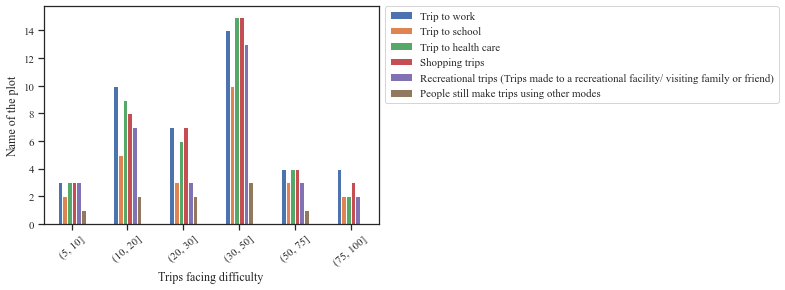

<Figure size 1080x576 with 0 Axes>

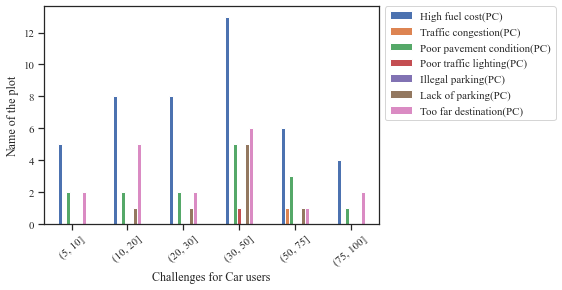

<Figure size 1080x576 with 0 Axes>

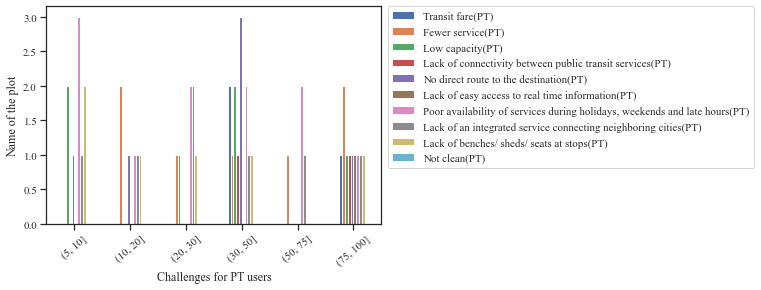

<Figure size 1080x576 with 0 Axes>

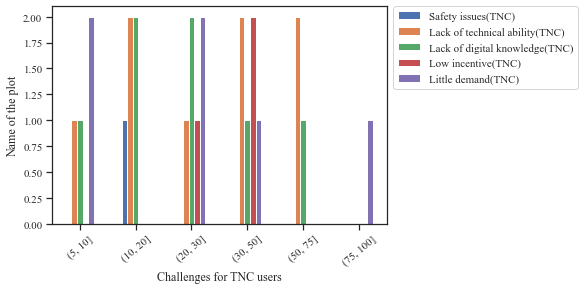

<Figure size 1080x576 with 0 Axes>

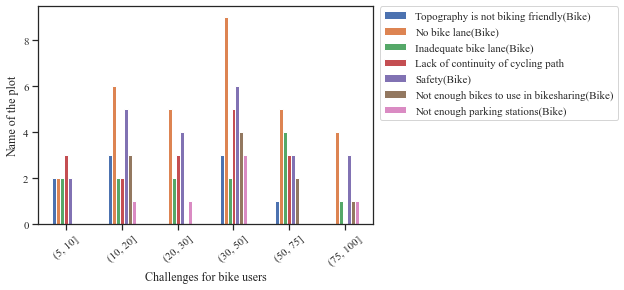

<Figure size 1080x576 with 0 Axes>

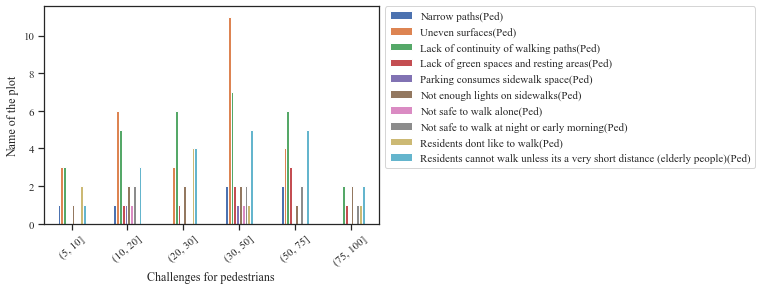

<Figure size 1080x576 with 0 Axes>

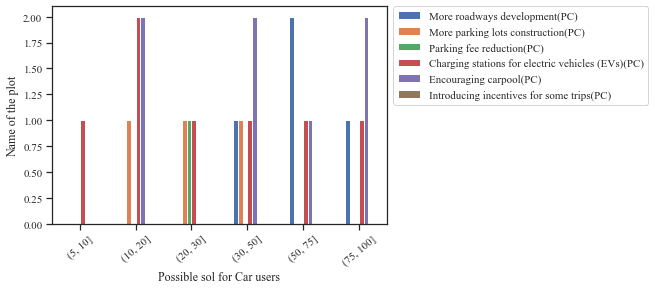

<Figure size 1080x576 with 0 Axes>

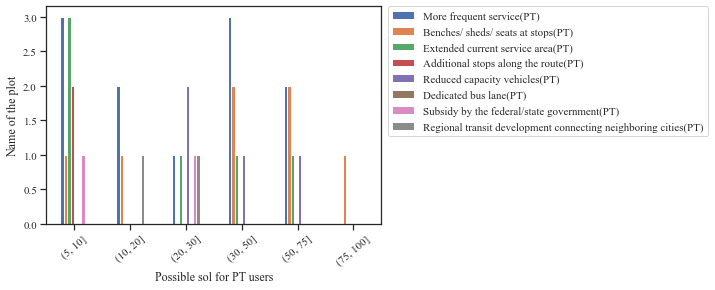

<Figure size 1080x576 with 0 Axes>

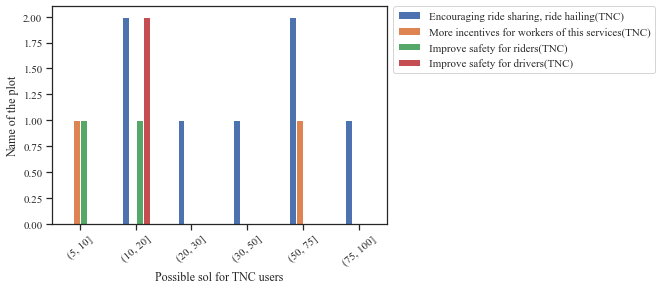

<Figure size 1080x576 with 0 Axes>

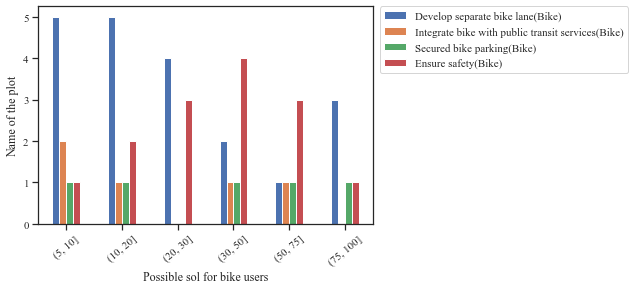

<Figure size 1080x576 with 0 Axes>

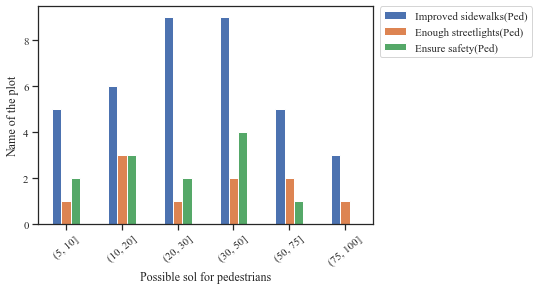

<Figure size 1080x576 with 0 Axes>

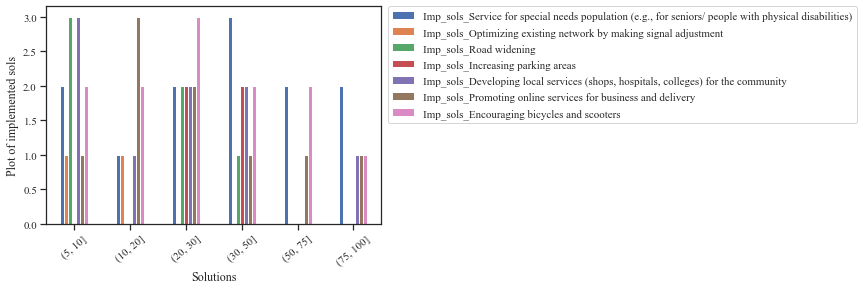

<Figure size 1080x576 with 0 Axes>

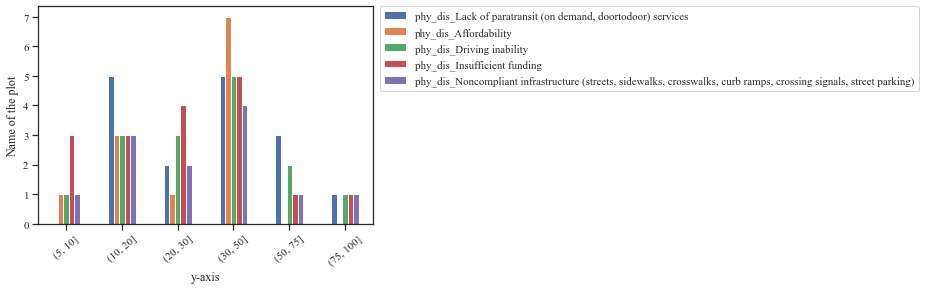

<Figure size 1080x576 with 0 Axes>

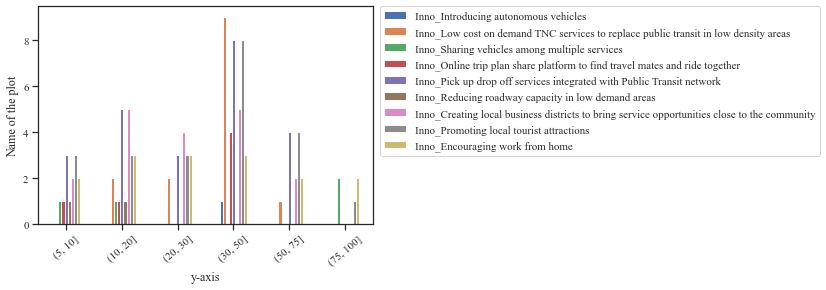

In [162]:
# grouped by distance from metro
# mean value 32.8, median 29.9
df_by_distS = df_by_range(df_joined,'DIST_Metro', [5, 10, 20, 30, 50, 75, 100])
df_by_distO = df_by_range(df_cluster,'DIST_Metro', [5, 10, 20, 30, 50, 75, 100])
w = df_by_distS.iloc[:,1]/df_by_distO.iloc[:,1]

make_plot(df_by_distS, 0, 2, 22, 'Economy', 'Major economy of the city')
make_plot(df_by_distS, 0, 23, 29, 'Trips facing difficulty', 'Name of the plot')
make_plot(df_by_distS, 0, 66, 73, 'Challenges for Car users', 'Name of the plot')
make_plot(df_by_distS, 0, 76, 86, 'Challenges for PT users', 'Name of the plot')
make_plot(df_by_distS, 0, 89, 94, 'Challenges for TNC users', 'Name of the plot')
make_plot(df_by_distS, 0, 97, 104, 'Challenges for bike users', 'Name of the plot')
make_plot(df_by_distS, 0, 107, 117, 'Challenges for pedestrians', 'Name of the plot')
make_plot(df_by_distS, 0, 120, 126, 'Possible sol for Car users', 'Name of the plot')
make_plot(df_by_distS, 0, 128, 136, 'Possible sol for PT users', 'Name of the plot')
make_plot(df_by_distS, 0, 139, 143, 'Possible sol for TNC users', 'Name of the plot')
make_plot(df_by_distS, 0, 146, 150, 'Possible sol for bike users', 'Name of the plot')
make_plot(df_by_distS, 0, 152, 155, 'Possible sol for pedestrians', 'Name of the plot')
make_plot(df_by_distS, 0, 158, 165, 'Solutions', 'Plot of implemented sols')
make_plot(df_by_distS, 0, 168,173, 'y-axis', 'Name of the plot')
make_plot(df_by_distS, 0, 177,186, 'y-axis', 'Name of the plot')

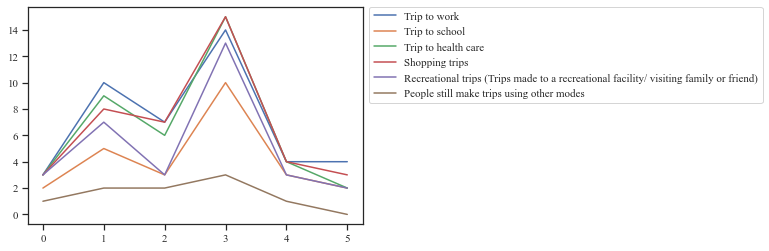

In [139]:
df_by_distS.iloc[:,23:29].plot()
plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left', borderaxespad = 0)

In [140]:
df_by_clus = df_by_range(df_joined, 'Cluster', binsize)
#df_by_clus

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\4166925791.py:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_df = input_df.set_index(column_name).ne(0).sum(level=0)


In [141]:
percent_response = df_by_clus.Name/df_cluster_count.NAME*100
percent_response

0    14.285714
1    15.000000
2    29.411765
3    28.260870
4    14.285714
5    26.666667
dtype: float64

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\3258610264.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


<Figure size 1080x576 with 0 Axes>

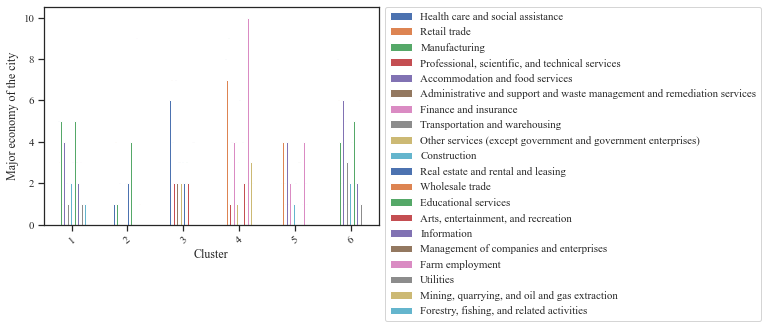

<Figure size 1080x576 with 0 Axes>

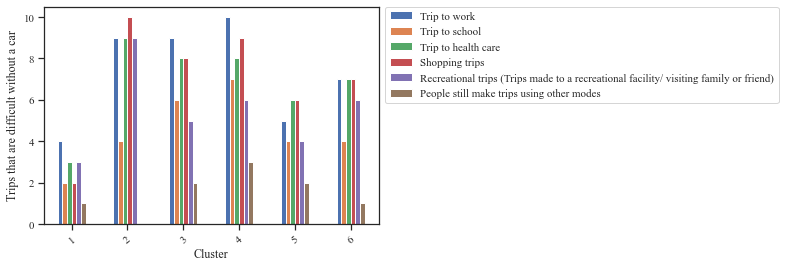

<Figure size 1080x576 with 0 Axes>

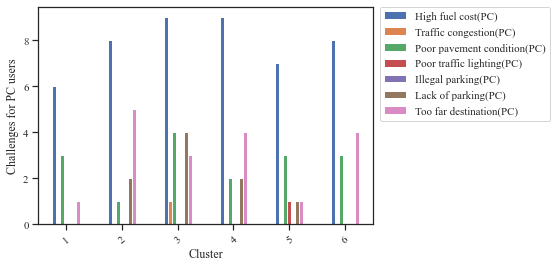

<Figure size 1080x576 with 0 Axes>

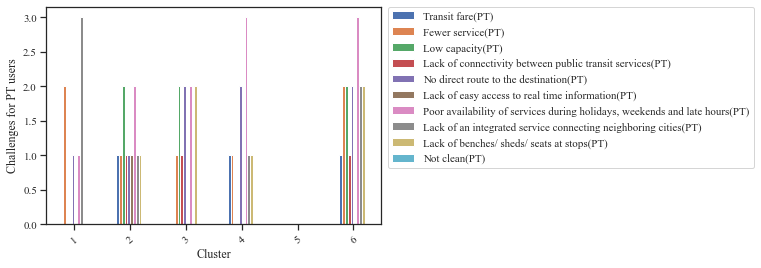

<Figure size 1080x576 with 0 Axes>

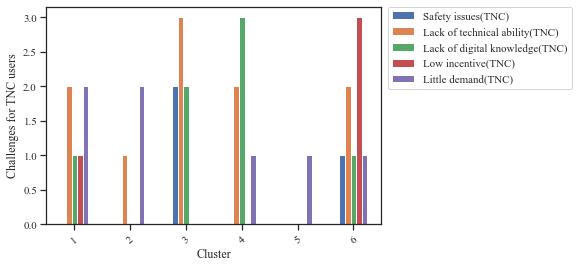

<Figure size 1080x576 with 0 Axes>

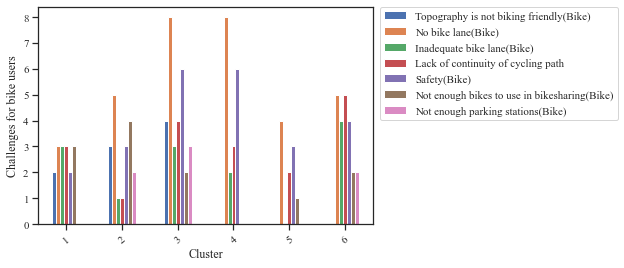

<Figure size 1080x576 with 0 Axes>

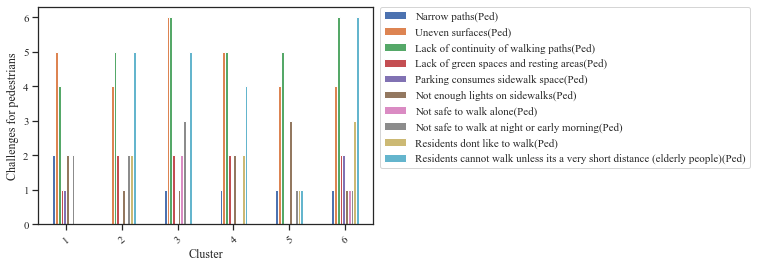

<Figure size 1080x576 with 0 Axes>

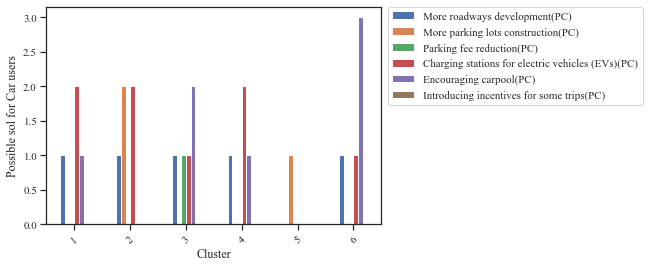

<Figure size 1080x576 with 0 Axes>

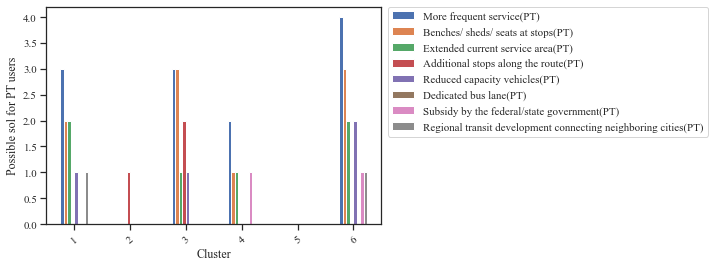

<Figure size 1080x576 with 0 Axes>

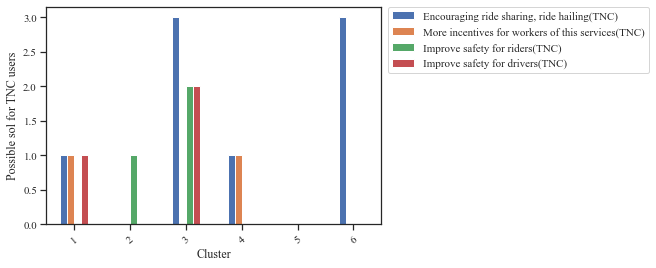

<Figure size 1080x576 with 0 Axes>

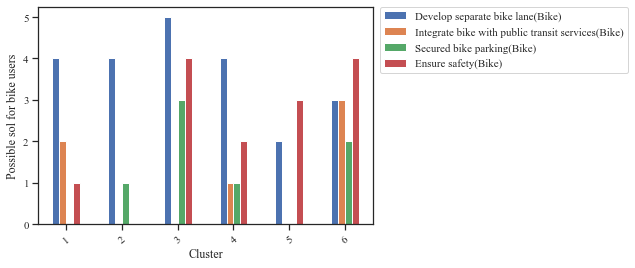

<Figure size 1080x576 with 0 Axes>

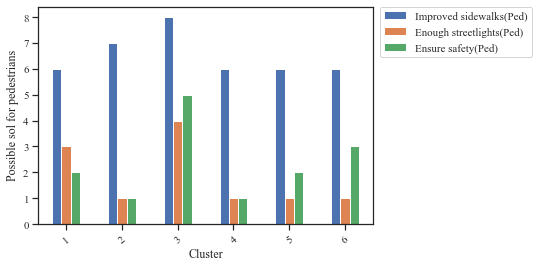

<Figure size 1080x576 with 0 Axes>

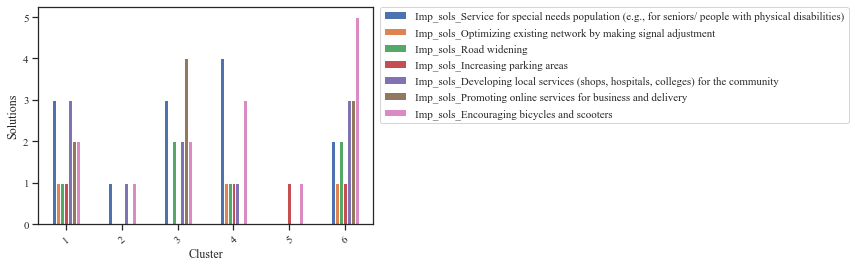

In [142]:
make_plot(df_by_clus, 0, 2, 22, 'Cluster', 'Major economy of the city')
make_plot(df_by_clus, 0, 23, 29, 'Cluster', 'Trips that are difficult without a car')
make_plot(df_by_clus, 0, 66, 73, 'Cluster', 'Challenges for PC users')
make_plot(df_by_clus, 0, 76, 86, 'Cluster', 'Challenges for PT users')
make_plot(df_by_clus, 0, 89, 94, 'Cluster','Challenges for TNC users')
make_plot(df_by_clus, 0, 97, 104, 'Cluster', 'Challenges for bike users')
make_plot(df_by_clus, 0, 107, 117, 'Cluster', 'Challenges for pedestrians')
make_plot(df_by_clus, 0, 120, 126, 'Cluster', 'Possible sol for Car users')
make_plot(df_by_clus, 0, 128, 136, 'Cluster','Possible sol for PT users')
make_plot(df_by_clus, 0, 139, 143, 'Cluster','Possible sol for TNC users')
make_plot(df_by_clus, 0, 146, 150, 'Cluster','Possible sol for bike users')
make_plot(df_by_clus, 0, 152, 155, 'Cluster','Possible sol for pedestrians')
make_plot(df_by_clus, 0, 158, 165, 'Cluster','Solutions')

In [143]:
"""
Unfinished
3         Belgium village
6              Byron city
9             Canton city
11             Carmi city
14        Clifton village
20    Forest Park village
25     Harristown village
26    Hazel Crest village
27      Henderson village
42      Palestine village
44            Paxton city
46     Pinckneyville city
55          Sterling city
57        Tallula village
59     Third Lake village

Excluded 
66      Augusta village
53           Cairo city
79            Cuba city
68          Joy village
73         Lincoln city
33      Maywood village
74    New Haven village
11        Sterling city
23                  NaN
63                  NaN
76                  NaN
80                  NaN
87                  NaN
89                  NaN

"""

'\nUnfinished\n3         Belgium village\n6              Byron city\n9             Canton city\n11             Carmi city\n14        Clifton village\n20    Forest Park village\n25     Harristown village\n26    Hazel Crest village\n27      Henderson village\n42      Palestine village\n44            Paxton city\n46     Pinckneyville city\n55          Sterling city\n57        Tallula village\n59     Third Lake village\n\nExcluded \n66      Augusta village\n53           Cairo city\n79            Cuba city\n68          Joy village\n73         Lincoln city\n33      Maywood village\n74    New Haven village\n11        Sterling city\n23                  NaN\n63                  NaN\n76                  NaN\n80                  NaN\n87                  NaN\n89                  NaN\n\n'

In [144]:
new_labeled_df_from2010_2020 = pd.read_csv(r'D:\Work\Box Sync\Trends_all states\current_df.csv')

In [145]:
new_labeled_df_from2010_2020.head()
#df_survey.head()

,Unnamed: 0,GEO_ID,NAME_y,NAMELSAD,Pop_estimate,State,percent_chng,trend,h,p,...,s,var_s,slope,intercept,P_20,mean_changeRate,total_changeRate,count_neg_rate,density_km2,label
0,6097,1600000US1737621,"Iola village, Illinois",Iola village,"[117, 128, 103, 95, 131, 107, 148, 143, 138, 1...",Illinois,[ 0.094 -0.195 -0.078 0.379 -0.183 0.383 -0....,no trend,False,0.533417,...,9.0,165.0,1.750,119.250,91.0,-0.0002,-0.222222,6.0,36.433460,3 slowly depopulating
1,6098,1600000US1728807,"Gays village, Illinois",Gays village,"[305, 280, 307, 341, 310, 288, 293, 274, 216, ...",Illinois,[-0.082 0.096 0.111 -0.091 -0.071 0.017 -0....,decreasing,True,0.019517,...,-31.0,165.0,-11.125,343.625,209.0,-0.0325,-0.314754,6.0,199.211542,2 moderately depopulating
2,6099,1600000US1756627,"Orland Hills village, Illinois",Orland Hills village,"[7011, 7071, 7118, 7213, 7252, 7259, 7241, 722...",Illinois,[ 0.009 0.007 0.013 0.005 0.001 -0.002 -0....,no trend,False,0.755497,...,5.0,165.0,5.800,7152.000,7069.0,0.0010,0.008273,5.0,2384.336572,4 fluctuating
3,6100,1600000US1704247,"Baylis village, Illinois",Baylis village,"[200, 179, 125, 170, 182, 195, 190, 177, 131, ...",Illinois,[-0.105 -0.302 0.36 0.071 0.071 -0.026 -0....,no trend,False,0.161125,...,-19.0,165.0,-4.500,199.500,126.0,-0.0285,-0.370000,6.0,103.231219,2 moderately depopulating
4,6101,1600000US1726480,"Florence village, Illinois",Florence village,"[34, 25, 28, 25, 28, 40, 55, 64, 61, 66, 51]",Illinois,[-0.265 0.12 -0.107 0.12 0.429 0.375 0....,increasing,True,0.012196,...,33.0,163.0,3.750,21.250,51.0,0.0644,0.500000,4.0,71.388978,7 highly increasing


In [146]:
new_labeled_df_from2010_2020['Name'] = new_labeled_df_from2010_2020['NAMELSAD']

In [147]:
labeled_df = pd.merge(df_survey, new_labeled_df_from2010_2020, on="Name", how="left")

In [182]:
labeled_df_grouped = labeled_df.groupby(['label']).agg(lambda x: x.ne(0).sum()).reset_index()

In [183]:
labeled_df_grouped 

,label,Name,Health care and social assistance,Retail trade,Manufacturing,"Professional, scientific, and technical services",Accommodation and food services,Administrative and support and waste management and remediation services,Finance and insurance,Transportation and warehousing,...,Tau,s,var_s,slope,intercept,P_20,mean_changeRate,total_changeRate,count_neg_rate,density_km2
0,2 moderately depopulating,6,0,0,0,0,0,0,0,1,...,6,6,6,6,6,6,6,6,6,6
1,3 slowly depopulating,53,30,26,22,7,25,4,15,9,...,53,53,53,53,53,53,53,53,53,53
2,4 fluctuating,6,0,4,2,0,2,0,0,1,...,6,6,6,6,6,6,6,6,6,6
3,5 slowly increasing,1,0,1,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1


In [188]:
#labeled_df_grouped.columns

C:\Users\uttar\AppData\Local\Temp\ipykernel_8384\3258610264.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


<Figure size 1080x576 with 0 Axes>

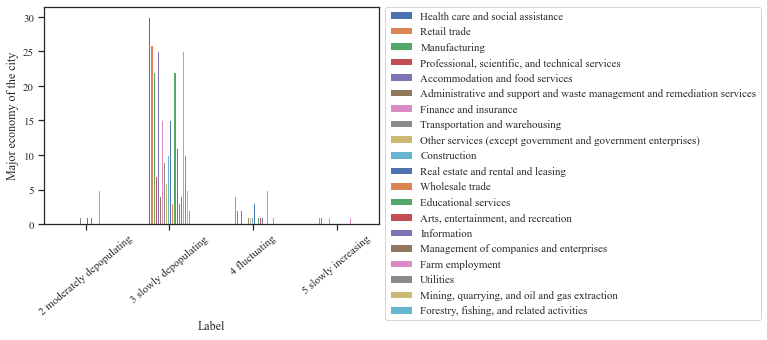

<Figure size 1080x576 with 0 Axes>

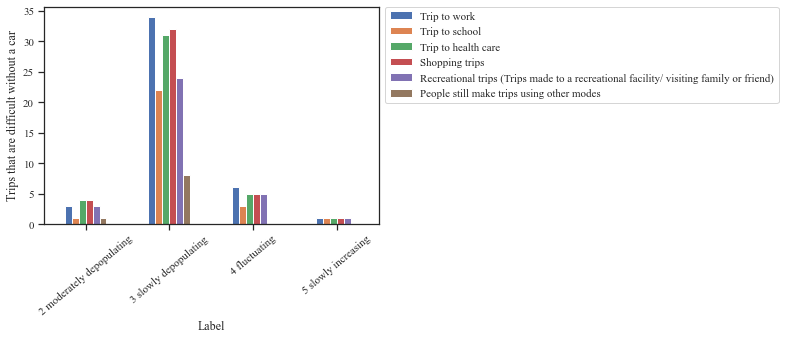

<Figure size 1080x576 with 0 Axes>

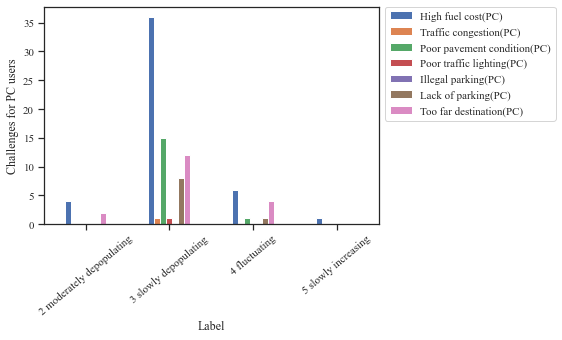

<Figure size 1080x576 with 0 Axes>

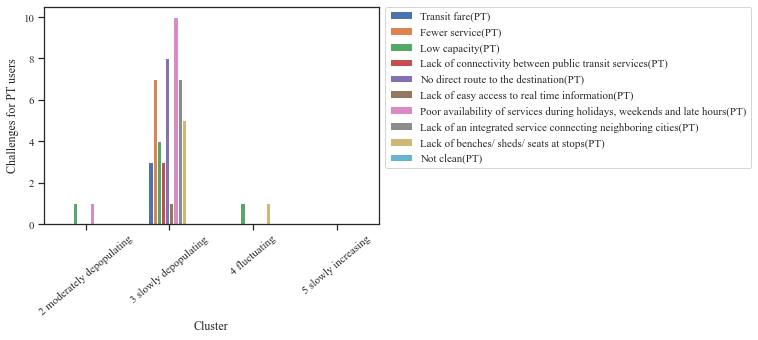

<Figure size 1080x576 with 0 Axes>

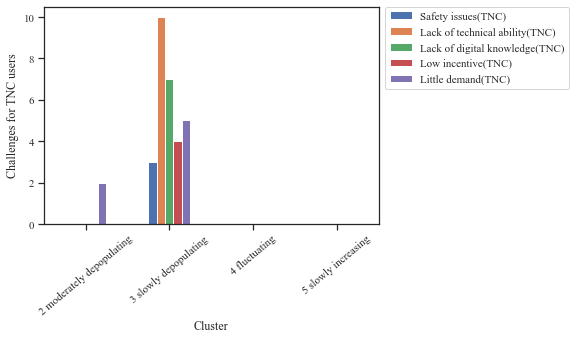

<Figure size 1080x576 with 0 Axes>

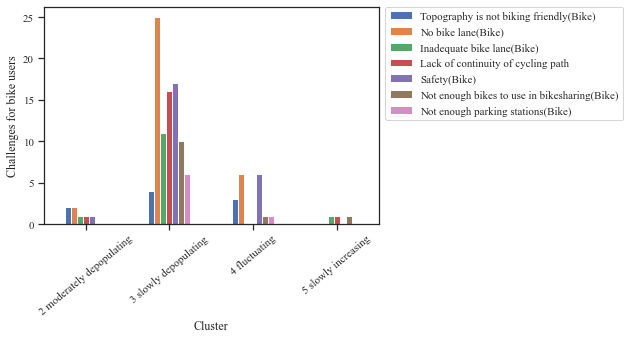

<Figure size 1080x576 with 0 Axes>

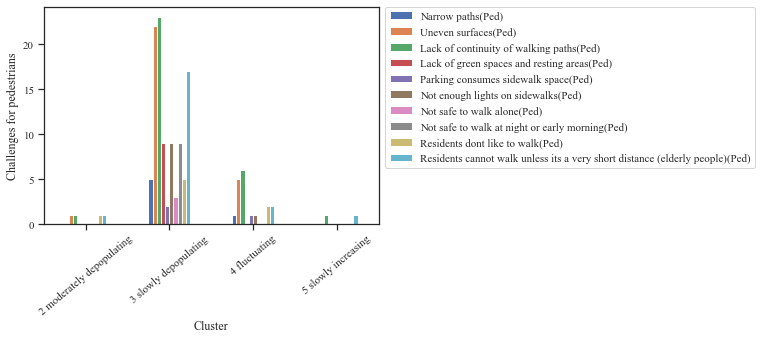

<Figure size 1080x576 with 0 Axes>

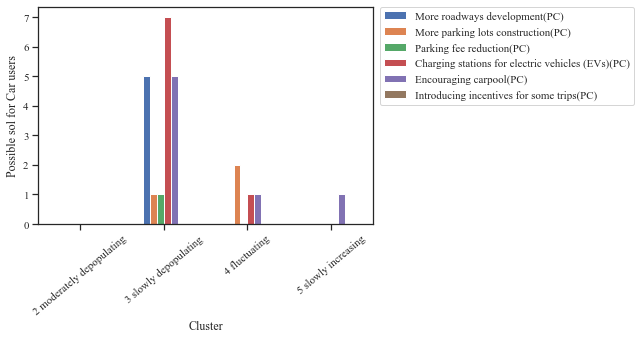

<Figure size 1080x576 with 0 Axes>

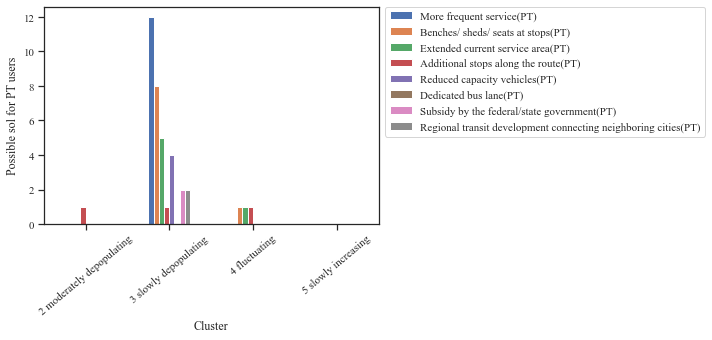

<Figure size 1080x576 with 0 Axes>

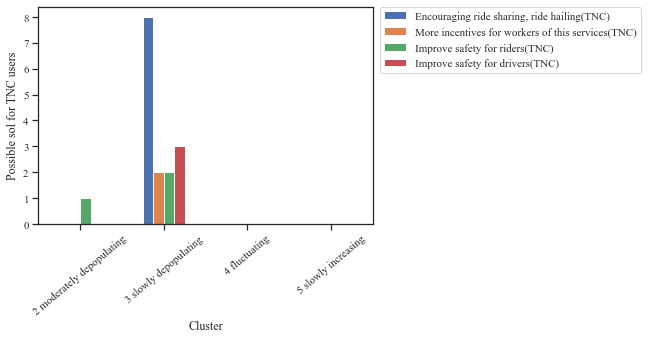

<Figure size 1080x576 with 0 Axes>

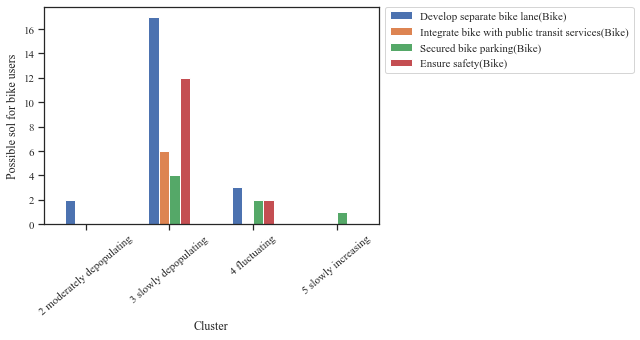

<Figure size 1080x576 with 0 Axes>

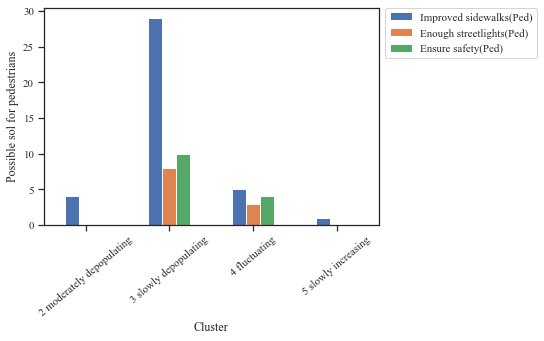

<Figure size 1080x576 with 0 Axes>

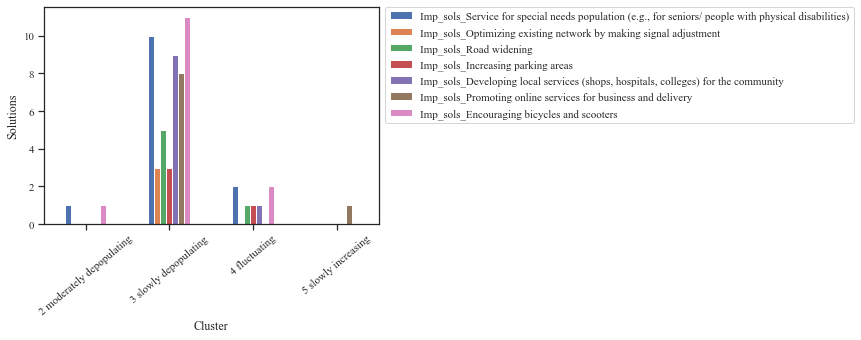

In [186]:
df = labeled_df_grouped 
make_plot(df, 0, 2, 22, 'Label', 'Major economy of the city')
make_plot(df, 0, 23, 29, 'Label', 'Trips that are difficult without a car')
make_plot(df, 0, 66, 73, 'Label', 'Challenges for PC users')
make_plot(df, 0, 76, 86, 'Cluster', 'Challenges for PT users')
make_plot(df, 0, 89, 94, 'Cluster','Challenges for TNC users')
make_plot(df, 0, 97, 104, 'Cluster', 'Challenges for bike users')
make_plot(df, 0, 107, 117, 'Cluster', 'Challenges for pedestrians')
make_plot(df, 0, 120, 126, 'Cluster', 'Possible sol for Car users')
make_plot(df, 0, 128, 136, 'Cluster','Possible sol for PT users')
make_plot(df, 0, 139, 143, 'Cluster','Possible sol for TNC users')
make_plot(df, 0, 146, 150, 'Cluster','Possible sol for bike users')
make_plot(df, 0, 152, 155, 'Cluster','Possible sol for pedestrians')
make_plot(df, 0, 158, 165, 'Cluster','Solutions')